#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

In [22]:
data.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

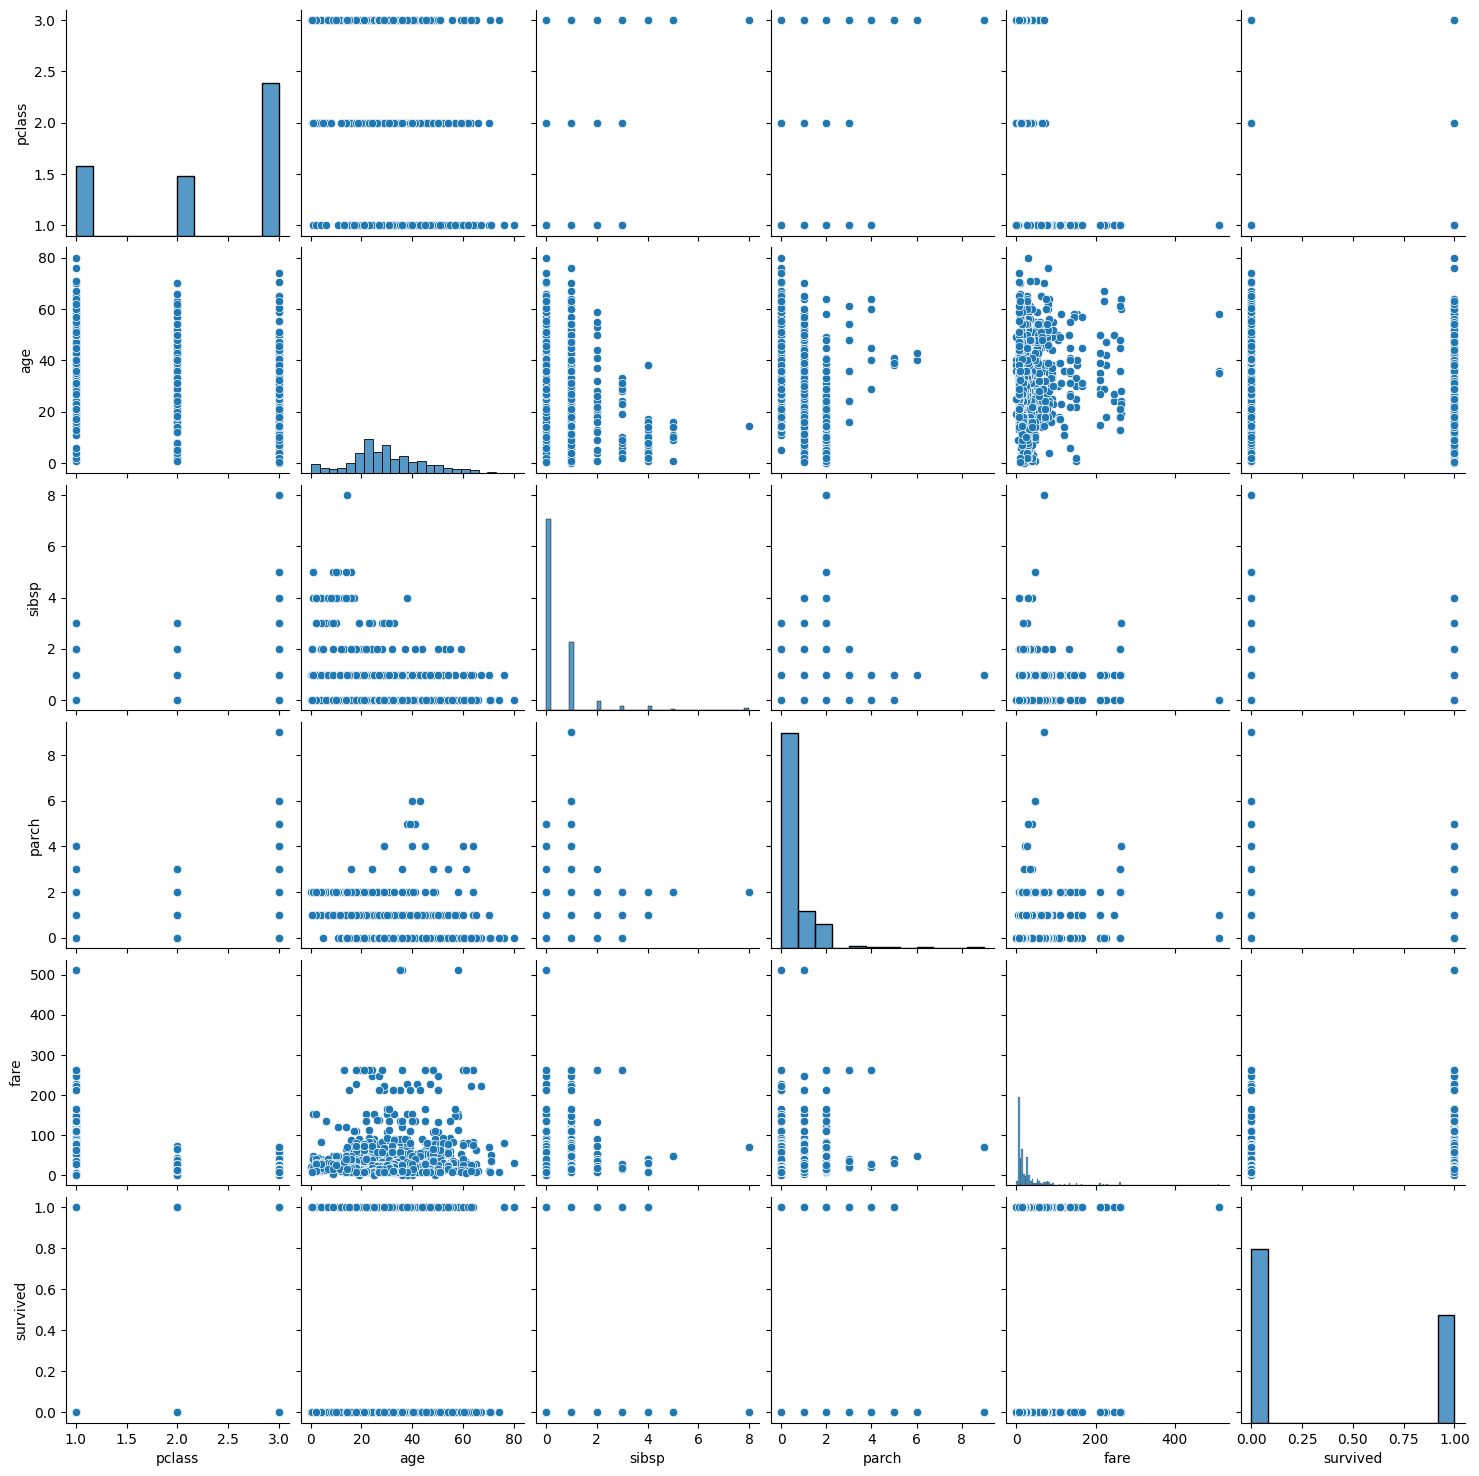

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
data= pd.read_csv('/workspaces/707-lecture-master/2-week2/data/titanic.csv')
data.head()

# Select only 
numeric_columns = data.select_dtypes(include='number')

sns.pairplot(numeric_columns)
plt.show()


#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

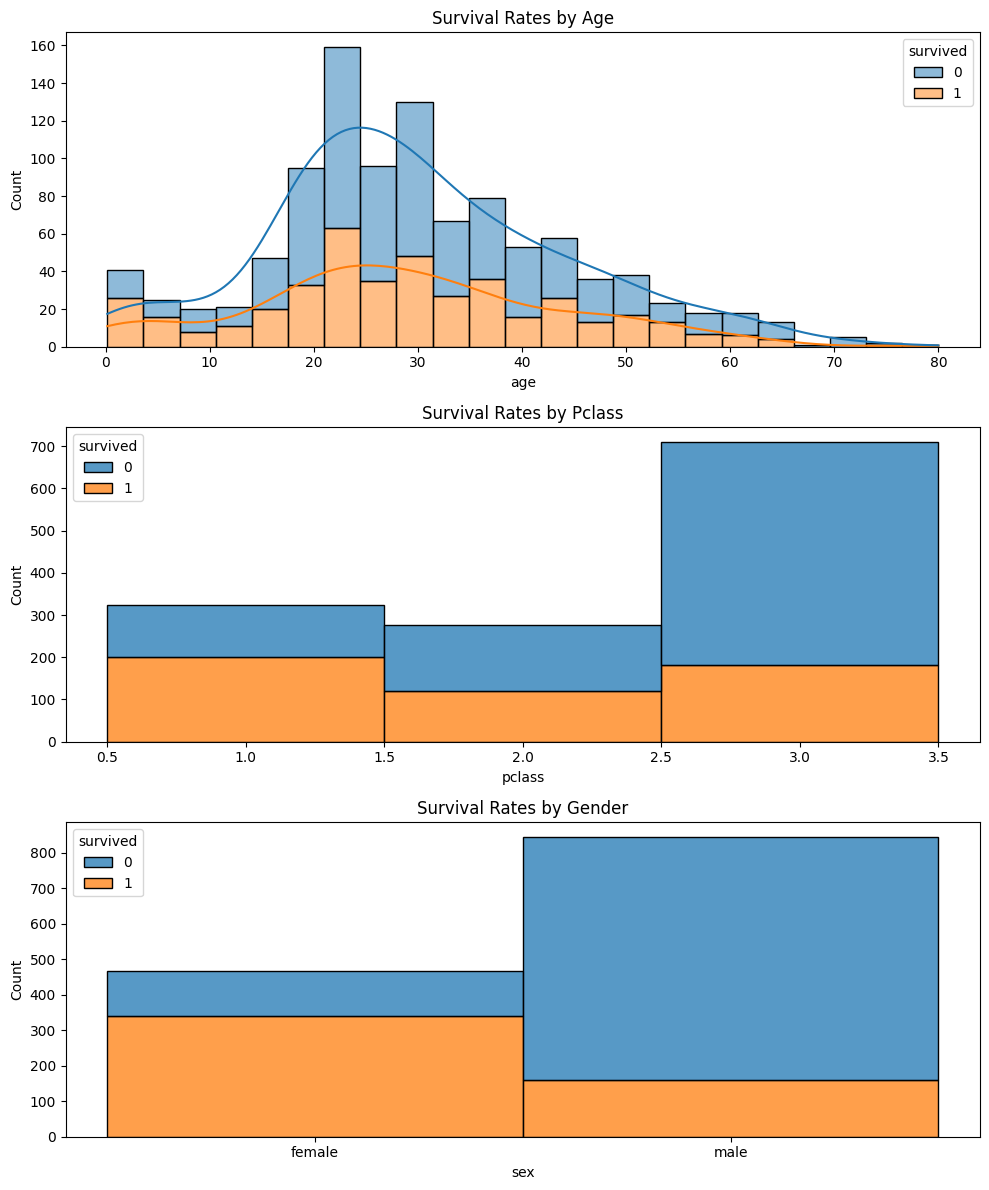

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# age
sns.histplot(data=data, x='age', hue='survived', multiple='stack', ax=axes[0], kde=True)
axes[0].set_title('Survival Rates by Age')

# pclass
sns.histplot(data=data, x='pclass', hue='survived', multiple='stack', discrete=True, ax=axes[1])
axes[1].set_title('Survival Rates by Pclass')

# gender
sns.histplot(data=data, x='sex', hue='survived', multiple='stack', discrete=True, ax=axes[2])
axes[2].set_title('Survival Rates by Gender')


plt.tight_layout()
plt.show()


#### **Exercise 3:**

Examine your data for NAs.  For the features that you think are likely to matter given your initial analysis, use an imputer to fill in the missing values. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.

In [15]:
import pandas as pd

# Assuming 'data' is your DataFrame
missing_values = data.isnull().sum()

print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

selected_features = ['age', 'pclass']

data[selected_features] = data[selected_features].fillna(data[selected_features].mean())

df = data.drop(columns=['cabin'])

print("\nColumns with Missing Values after filling na:")
print(df.isnull().sum())


Columns with Missing Values:
fare           1
cabin       1014
embarked       2
dtype: int64

Columns with Missing Values after filling na:
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    2
survived    0
dtype: int64


#### **Exercise 4**

Recall that sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

string_columns = df.select_dtypes(include='object').columns

label_encoder = LabelEncoder()

df[string_columns] = df[string_columns].apply(label_encoder.fit_transform)

print(df.head())


   pclass  name  sex      age  sibsp  parch  ticket      fare  embarked  \
0     1.0    21    0  29.0000      0      0     187  211.3375         2   
1     1.0    23    1   0.9167      1      2      49  151.5500         2   
2     1.0    24    0   2.0000      1      2      49  151.5500         2   
3     1.0    25    1  30.0000      1      2      49  151.5500         2   
4     1.0    26    0  25.0000      1      2      49  151.5500         2   

   survived  
0         1  
1         1  
2         0  
3         0  
4         0  


#### **Exercise 5**

Using 5-fold cross-validation, compare the performance of a LogisticRegression classifier with that of a DecisionTree classifier.

In [28]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import time

# Assuming 'data' is your DataFrame
# Handle missing values
data.dropna(subset=['survived'], inplace=True)

# Identify and label encode string columns
string_columns = data.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
data[string_columns] = data[string_columns].apply(label_encoder.fit_transform)

# Assume 'X' contains features and 'y' contains the target variable
X = data.drop('survived', axis=1)  # Replace 'survived' with your actual target column
y = data['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
logistic_regression = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), LogisticRegression())
decision_tree = DecisionTreeClassifier()

# Compare performance using 5-fold cross-validation
start_time = time.time()
logistic_regression_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='accuracy')
logistic_regression_training_time = time.time() - start_time

start_time = time.time()
decision_tree_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
decision_tree_training_time = time.time() - start_time

# Display results
print("Logistic Regression Mean Accuracy: {:.2f}".format(logistic_regression_scores.mean()))
print("Decision Tree Mean Accuracy: {:.2f}".format(decision_tree_scores.mean()))

# Optional: Display training time
print("Logistic Regression Training Time: {:.4f} seconds".format(logistic_regression_training_time))
print("Decision Tree Training Time: {:.4f} seconds")


Logistic Regression Mean Accuracy: 0.80
Decision Tree Mean Accuracy: 0.77
Logistic Regression Training Time: 0.0448 seconds
Decision Tree Training Time: {:.4f} seconds


_Note, the following exercises use the housing data introduced in this week's lecture notes._

#### **Exercise 6:** 

Using the housing data introduced with the end-to-end example this week, try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the [documentation](https://scikit-learn.org/stable/modules/svm.html) if you are interested). Use GridSearchCV to explore the parameter space. How does the best `SVR` predictor perform?

In [35]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the housing data from the CSV file
housing = pd.read_csv('/workspaces/707-lecture-master/2-week2/data/housing/housing.csv')

# Selecting only the first 5,000 instances for faster training
housing_subset = housing.head(5000)

# Separate features and target variable
X = housing_subset.drop('median_house_value', axis=1)
y = housing_subset['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define hyperparameters to search
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 10],
    'svr__gamma': ['scale', 'auto', 0.1, 1]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best SVR model
best_svr = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Display results
print("Best SVR Model Parameters:", grid_search.best_params_)
print("Root Mean Squared Error on Test Set:", rmse)


ValueError: 
All the 72 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/codespace/.local/lib/python3.10/site-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 919, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py", line 839, in fit
    return self.partial_fit(X, y, sample_weight)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py", line 875, in partial_fit
    X = self._validate_data(
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 605, in _validate_data
    out = check_array(X, input_name="X", **check_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/home/codespace/.local/lib/python3.10/site-packages/pandas/core/generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'INLAND'


#### **Exercise 7:**

Try replacing the `GridSearchCV` with a `RandomizedSearchCV`.

#### **Exercise 8:**

Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes.  Use a `RandomForestRegressor` to drive the feature selection process.